In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import sys, os, pathlib, shutil, platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import (
    train_test_split, 
    StratifiedShuffleSplit,
    StratifiedKFold,
)

from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
! pwd
! ls -la ./../../data/aviationMLCapstoneProjectData/DL_SelectFieldsJanuary2022/T_T100_SEGMENT_ALL_CARRIER.csv

In [ ]:
dataFileName='T_T100_SEGMENT_ALL_CARRIER.csv'
dataPathFull= pathlib.Path('./../../data/aviationMLCapstoneProjectData/DL_SelectFieldsJanuary2022') / dataFileName
myData = pd.read_csv(str(dataPathFull)) 




# T-100 Data January Subset

Distribution of null values (FYI-- no questions)

In [ ]:
myData.isnull().sum()

  
  Column numbers, column names, non-null counts, and data types (FYI-- no questions)

In [ ]:
myData.info()

## Question Group 1:
1.1. There are departures performed with zero distance. We'll ignore these, is that okay?  
1.2. There are rows with zero performed departures with a nonzero distance. Does that distance represent what should have been travelled? We'll ignore these, is that okay?  
1.3. There are rows that show departures performed with air time zero. Do you have any insights on how this could happen? We'll ignore these, is that okay?  
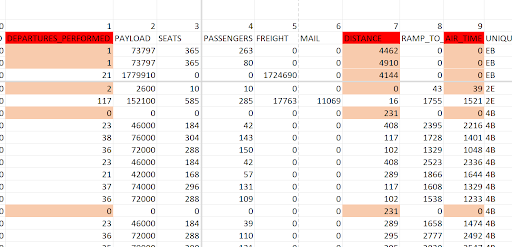

1.4. Some flights originate or finish outside of the US, should we consider them or not for the analysis?   
1.5. There are missing values for columns number 24,25,26 and 35,36,37?   
    [Column 24]: because the states are only for USA...missing is as a result of places not in US so they do not have an associated state  
    [Column 25]: FIPS codes are only for America  
    Columns 24 and 25 are not the same because Canada has state abrevs, but does not have state fips  
    [Column 26]: same as 24, but the full name instead of the abbrevs...so same reasoning as to why its missing some values  
  
  For columns 35, 36, 27: same reasoning respective to 24,25,26 but now its for destinations instead of origin  
  


## Question Group 2:
2.1. What is 41 and 42: AIRCRAFT_GROUP and AIRCRAFT_TYPE, and are they important for the analysis? See charts below.  
2.2. I plan to cover different space aggregations: aiport, city, region, state, national. Is region smaller than state?    
2.3. For aircraft configuration (column 43) there are three possibilites (passenger, cargo, or both) as described in the documentation, but our data has 4 values (1,2,3,4).   
  Question 2.3.1: Does 1, 2, 3 represent passenger, cargo, or both?     
  Question 2.3.2: What's the meaning of value 4, and should I ignore it?    
2.4. For column 47 and 48: What is DISTANCE_GROUP  and CLASS?    
2.5. For column 17 and 18: What is CARRIER_GROUP and CARRIER_GROUP_NEW?    

In [ ]:
myData['AIRCRAFT_GROUP'].value_counts().plot(kind="bar", title = "distinct value counts for AIRCRAFT_GROUP")


In [ ]:
# myData['AIRCRAFT_TYPE'].value_counts().plot(kind="barh")
hist03 = myData['AIRCRAFT_TYPE'].plot(kind='hist', title='AIRCRAFT_TYPE histogram')

In [ ]:
myData['AIRCRAFT_CONFIG'].value_counts().plot(kind="bar", title = "distinct value counts for AIRCRAFT_CONFIG")

Basic descriptive statistics for numeric columns: FYI no questions

In [ ]:
myData.describe()
myData.corr()